In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [11]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,10.255057,29.739042,9.501208,44.714355,241.000488,136.037567,41.502365,91.808304,168.746811,48.367359,...,61.189865,224.073624,198.456207,39.395752,32.228748,8.532695,217.832291,839.163818,30.166079,31.008511
2019-02,8.857046,28.428915,8.632245,44.395462,234.734589,133.645538,47.666981,91.718063,172.139084,46.329575,...,58.017998,224.737152,196.572144,38.957458,30.428539,8.647708,245.694107,839.221130,30.189758,31.833761
2019-03,8.967860,29.237251,7.668808,44.196819,241.413986,132.055634,44.906673,92.864807,182.671158,50.212765,...,49.833321,224.386871,220.466171,38.448929,28.948059,8.748202,243.043518,841.193481,29.858086,32.119053
2019-04,10.357189,28.334085,7.218593,44.468895,238.897476,132.553284,47.796688,93.605171,177.830673,56.591385,...,49.196072,224.584915,212.642761,37.901360,29.988390,8.868678,240.696548,840.104309,29.598694,34.350693
2019-05,12.511890,28.531675,8.082638,44.337666,249.633942,146.423218,46.763454,95.666306,191.513931,62.582455,...,57.345562,225.509857,219.088531,37.384979,30.390402,8.996480,246.671005,847.477234,29.650742,36.796227
2019-06,14.669719,28.513180,11.798945,44.358437,271.788391,154.595245,51.376087,98.896271,204.235306,61.152740,...,58.766510,225.243393,227.182327,37.964466,32.588707,9.122819,252.852600,846.578308,29.957417,40.799011
2019-07,15.930025,28.400837,12.630874,44.672607,274.342285,156.647095,56.722538,103.985153,216.225693,63.404995,...,64.472221,224.136597,233.497742,40.373112,36.129189,9.211939,268.074493,846.574707,30.204376,43.438404
2019-08,16.461666,30.555960,12.714647,45.221489,291.001709,158.369110,60.156025,107.212662,216.317841,74.077492,...,68.551399,224.088882,227.418427,46.662437,37.075851,9.327834,278.669464,917.270569,31.196730,43.901028
2019-09,16.066496,32.757187,12.755500,45.461952,297.122101,163.356964,59.981289,108.438232,215.464172,85.284500,...,70.509911,223.791229,231.667908,51.325554,37.427376,9.416952,277.408356,847.831482,32.828423,43.483017
2019-10,15.279581,34.120552,12.859158,45.428062,295.220917,177.059143,59.069294,108.153290,211.016022,90.575401,...,70.080269,219.202255,229.949371,52.167175,39.150394,9.455299,263.645050,850.102966,34.296734,42.791000


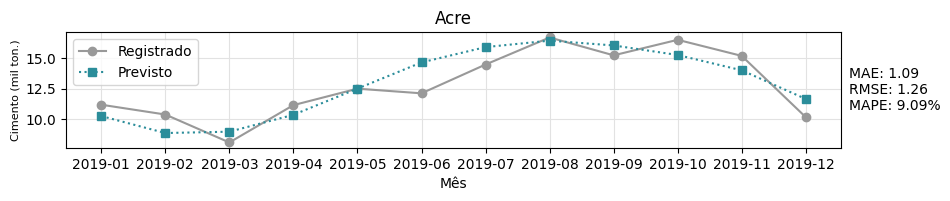

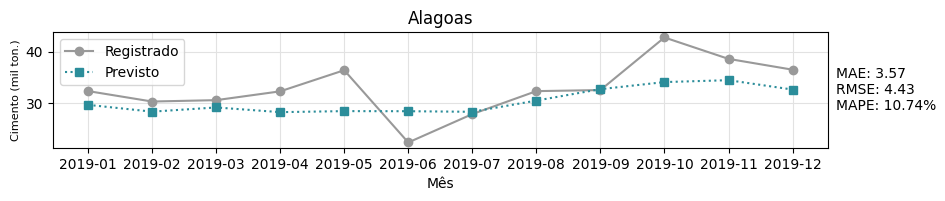

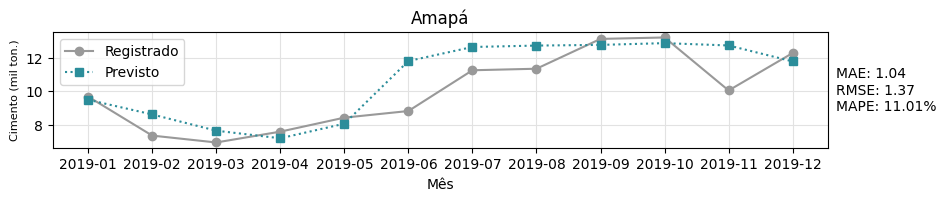

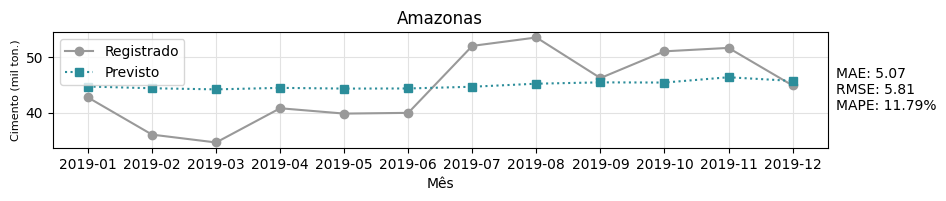

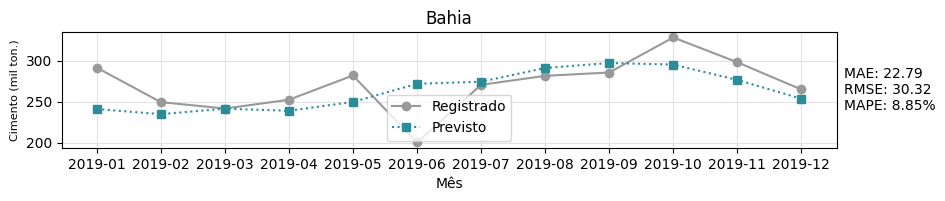

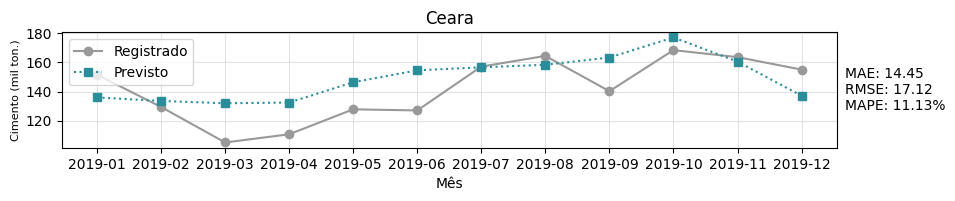

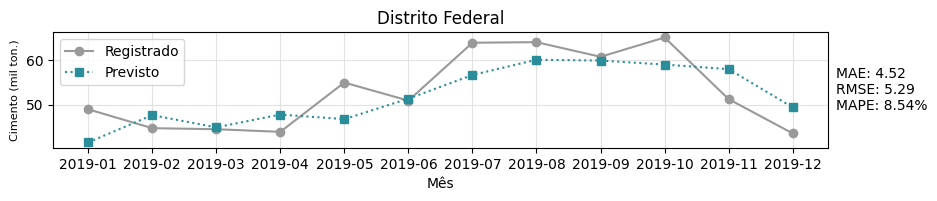

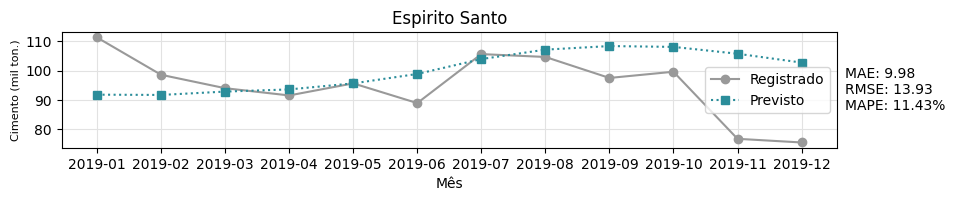

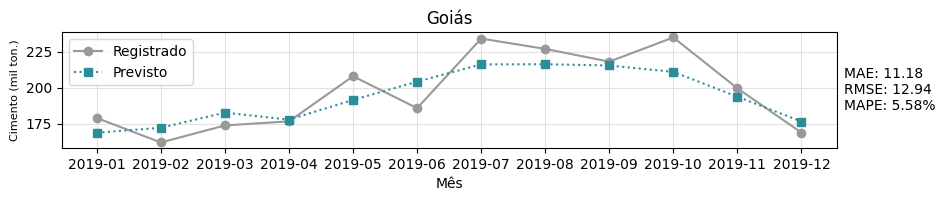

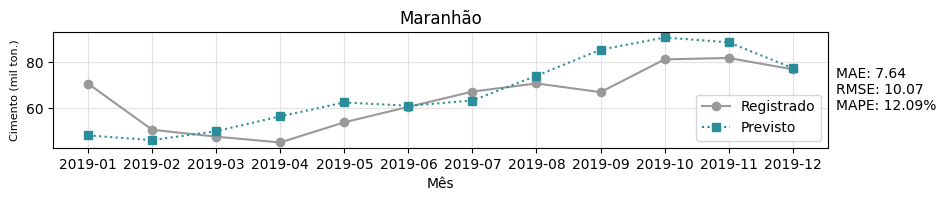

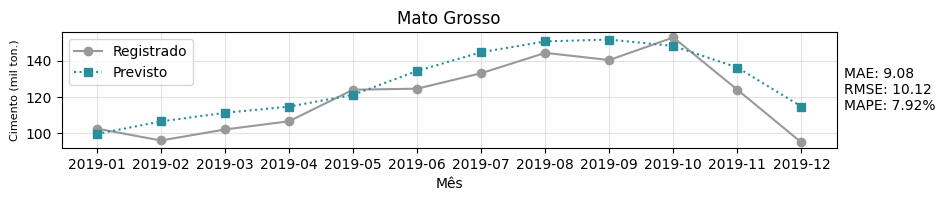

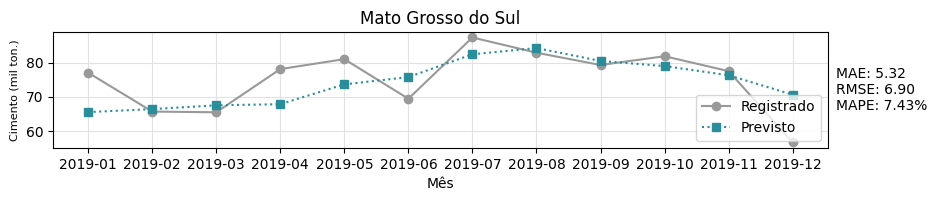

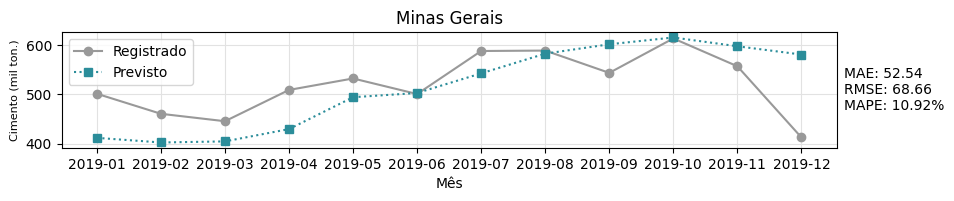

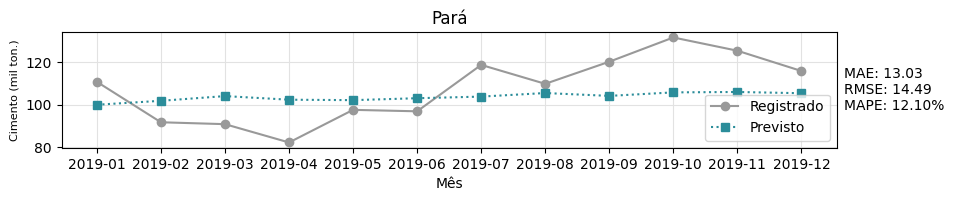

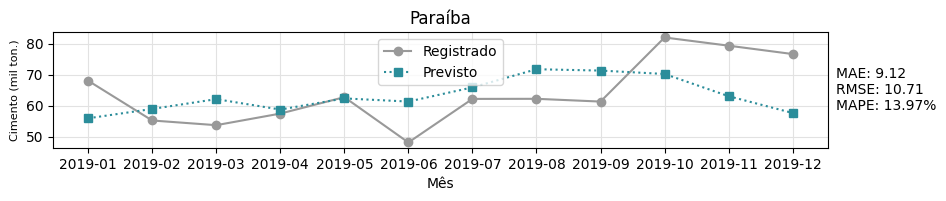

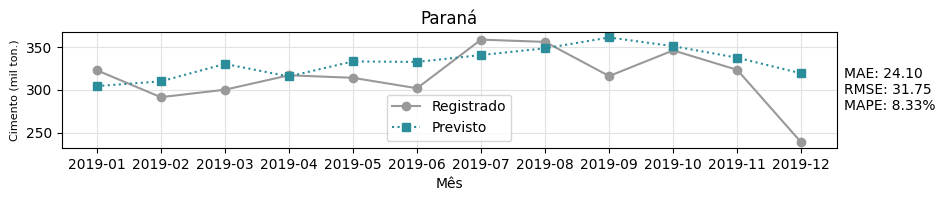

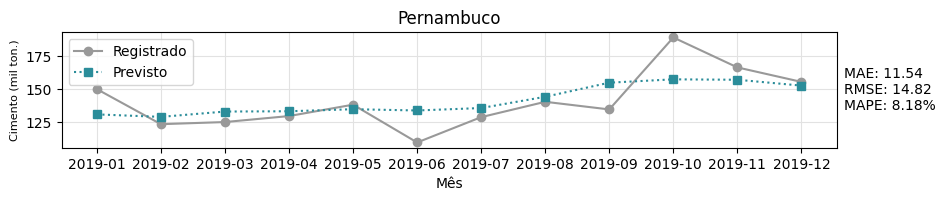

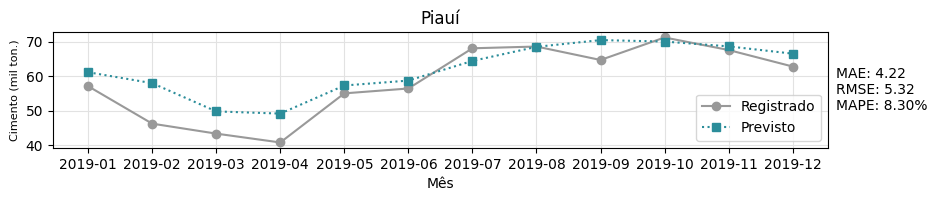

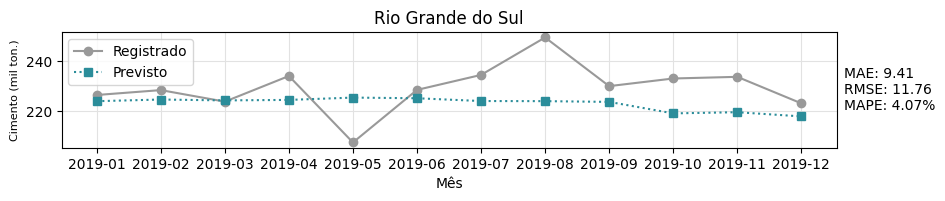

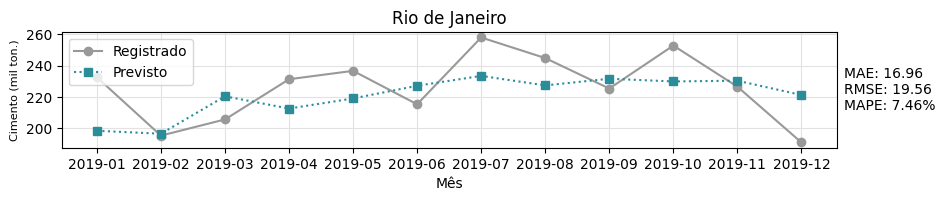

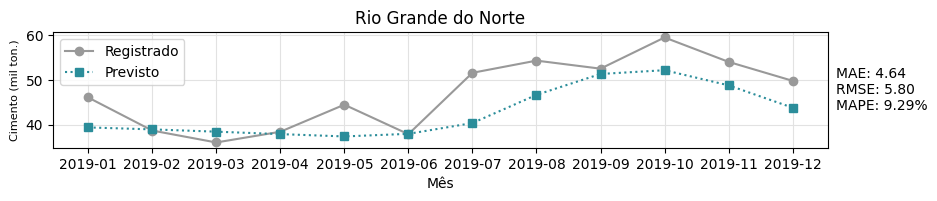

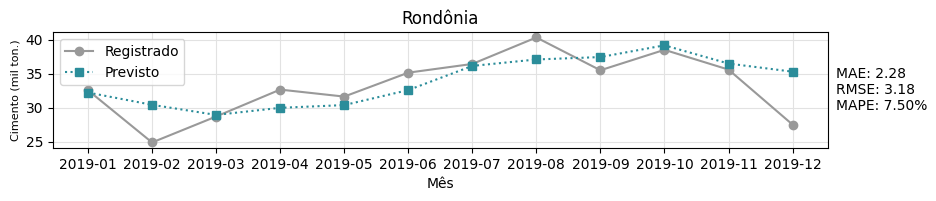

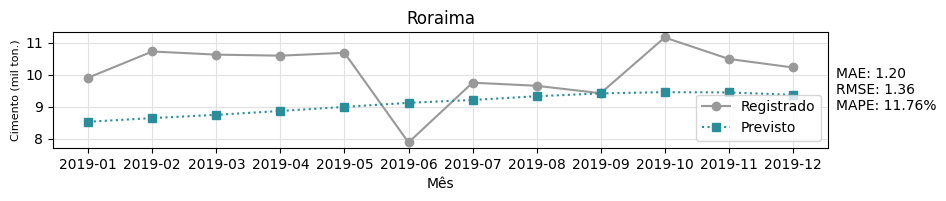

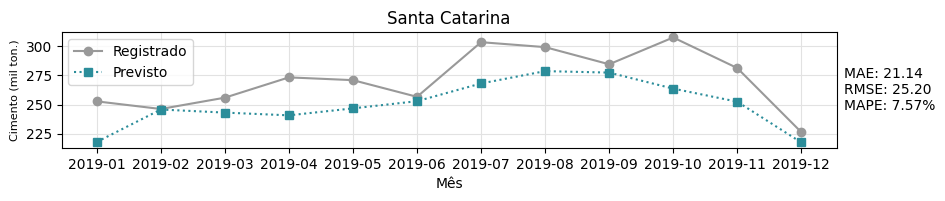

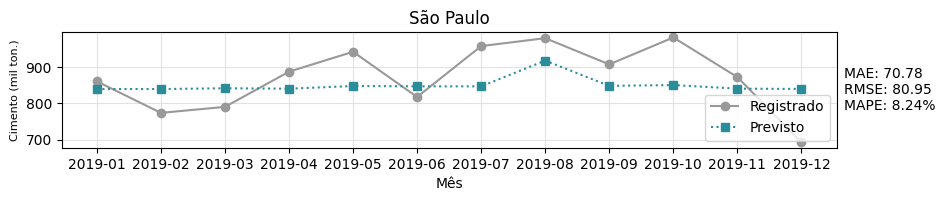

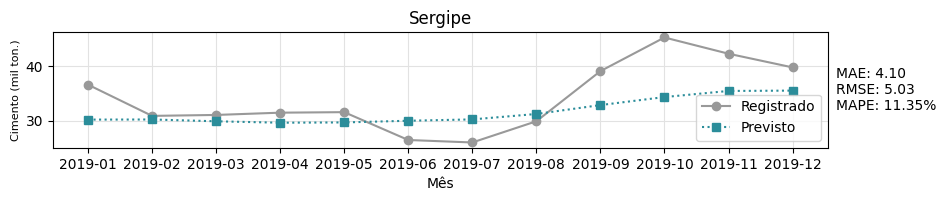

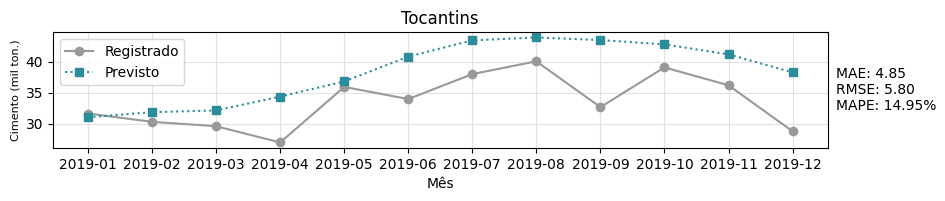

In [12]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#2b8d9a') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [13]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#2b8d9a')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

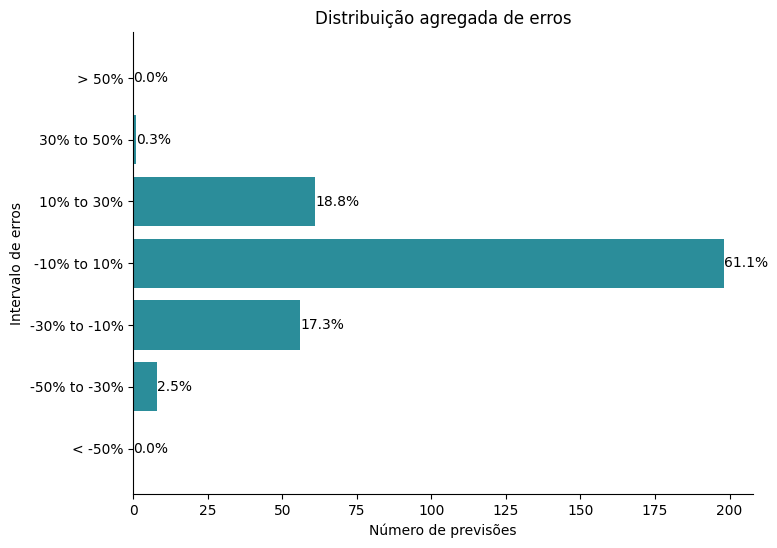

In [14]:
plot_error_distribution(df_registered, df_previsto)

In [15]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [16]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,1.26,1.09,9.09
Alagoas,4.43,3.57,10.74
Amapá,1.37,1.04,11.01
Amazonas,5.81,5.07,11.79
Bahia,30.32,22.79,8.85
Ceara,17.12,14.45,11.13
Distrito Federal,5.29,4.52,8.54
Espirito Santo,13.93,9.98,11.43
Goiás,12.94,11.18,5.58
